In [2]:
install.packages("pacman")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
pacman::p_load(readr)

In [4]:
pacman::p_load(ggplot2)

In [5]:
pacman::p_load(tidyr)

In [6]:
pacman::p_load(rio)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘R.oo’, ‘R.methodsS3’, ‘writexl’, ‘R.utils’



rio installed



In [7]:
pacman::p_load(dplyr)

In [8]:
pacman::p_load(psych)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘mnormt’, ‘GPArotation’



psych installed



In [38]:
dataset<- import("/content/indian_restaurants.csv")
head(dataset)

,restaurant_name,rating,average_price,average _delivery_time,south_indian_or_not,north_indian_or_not,fast_food_or_not,street_food,biryani_or_not,bakery_or_not,location
,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,# Momo,4.2,200,34,0,0,0,0,0,0,Durgapur
2,#99,4.1,100,31,0,0,0,0,0,0,Bareilly
3,#BBQ,3.6,200,57,0,0,1,0,0,0,Mangalore
4,#Dilliwaala6,3.7,100,38,0,1,0,1,0,0,Puducherry
5,#FlyFree,4.0,200,26,0,0,1,0,0,0,Ajmer
6,#Foodiz,3.5,100,23,0,1,1,0,0,0,Udaipur


In [39]:
summary(dataset)

 restaurant_name        rating      average_price   average _delivery_time
 Length:27656       Min.   :2.400   Min.   : 10.0   Min.   :  6.00        
 Class :character   1st Qu.:3.700   1st Qu.:100.0   1st Qu.: 26.00        
 Mode  :character   Median :4.000   Median :150.0   Median : 32.00        
                    Mean   :3.921   Mean   :173.9   Mean   : 33.36        
                    3rd Qu.:4.200   3rd Qu.:200.0   3rd Qu.: 40.00        
                    Max.   :4.900   Max.   :800.0   Max.   :190.00        
 south_indian_or_not north_indian_or_not fast_food_or_not  street_food    
 Min.   :0.00        Min.   :0.0000      Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.00        1st Qu.:0.0000      1st Qu.:0.0000   1st Qu.:0.0000  
 Median :0.00        Median :0.0000      Median :0.0000   Median :0.0000  
 Mean   :0.13        Mean   :0.4185      Mean   :0.3636   Mean   :0.1757  
 3rd Qu.:0.00        3rd Qu.:1.0000      3rd Qu.:1.0000   3rd Qu.:0.0000  
 Max.   :1.00        Max.

In [40]:
describe(dataset)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
restaurant_name*,1,27656,1.083511e+04,6285.2863422,10743.5,1.080191e+04,8165.41950,1.0,21958.0,21957.0,0.03650717,-1.2123325,37.794654936
rating,2,27656,3.920643e+00,0.3489429,4.0,3.948816e+00,0.29652,2.4,4.9,2.5,-0.75365884,0.4633810,0.002098262
average_price,3,27656,1.738714e+02,86.7090678,150.0,1.628695e+02,74.13000,10.0,800.0,790.0,1.34668058,2.6853760,0.521398568
average _delivery_time,4,27656,3.336187e+01,10.1129194,32.0,3.284100e+01,10.37820,6.0,190.0,184.0,0.69564625,2.5647884,0.060810961
south_indian_or_not,5,27656,1.299899e-01,0.3362984,0.0,3.751243e-02,0.00000,0.0,1.0,1.0,2.20040757,2.8418962,0.002022228
north_indian_or_not,6,27656,4.184987e-01,0.4933217,0.0,3.981289e-01,0.00000,0.0,1.0,1.0,0.33040650,-1.8908999,0.002966440
fast_food_or_not,7,27656,3.636101e-01,0.4810469,0.0,3.295218e-01,0.00000,0.0,1.0,1.0,0.56703407,-1.6785330,0.002892629
street_food,8,27656,1.756581e-01,0.3805359,0.0,9.459459e-02,0.00000,0.0,1.0,1.0,1.70459713,0.9056841,0.002288237
biryani_or_not,9,27656,1.755135e-01,0.3804126,0.0,9.441381e-02,0.00000,0.0,1.0,1.0,1.70591013,0.9101623,0.002287495


In [41]:
n_distinct(dataset$location) ##distinct locations

[1] 97

In [42]:
average_price_by_location <- dataset %>%
  group_by(location) %>%
  summarise(average_price = mean(average_price))

In [43]:
head(average_price_by_location)

location,average_price
<chr>,<dbl>
Agra,169.8750
Ahmedabad,170.6432
Ajmer,165.1376
Alappuzha,187.9310
Aligarh,175.6410
Allahabad,178.3632


In [44]:
top_10 <- average_price_by_location %>%
  arrange(desc(average_price)) %>%  # Sort by average price in descending order
  slice_head(n = 10)

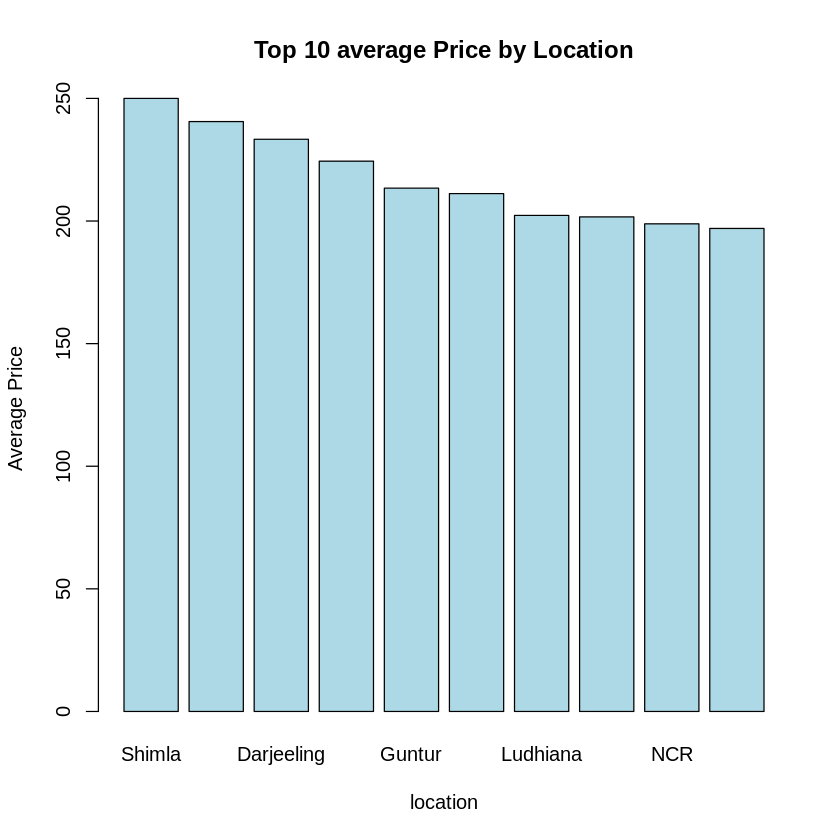

In [45]:

barplot(
  height = top_10$average_price,
  names.arg = top_10$location,
  col = "lightblue",
  main = "Top 10 average Price by Location",
  xlab = "location",
  ylab = "Average Price"
)


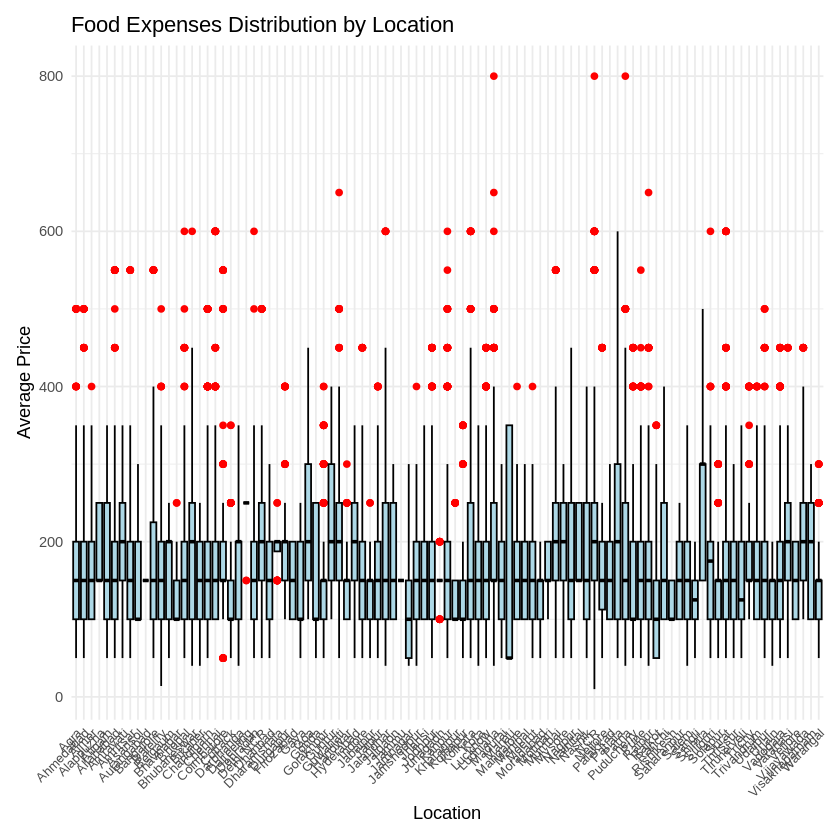

In [46]:
ggplot(dataset, aes(x = location, y = average_price)) +
  geom_boxplot(fill = "lightblue", color = "black", outlier.color = "red") +
  labs(
    title = "Food Expenses Distribution by Location",
    x = "Location",
    y = "Average Price"
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 8),
    plot.margin = margin(10, 10, 10, 10)
  )
ggsave("food_expenses_by_location.png", width = 12, height = 6, units = "in")

In [47]:
# Create stacked bar plot
regional_counts <- dataset %>%
  group_by(location) %>%
  summarise(
    south_indian_or_not = sum(south_indian_or_not),
    north_indian_or_not = sum(north_indian_or_not),
    street_food = sum(street_food)
  )

print(regional_counts)


# A tibble: 97 × 4
   location   south_indian_or_not north_indian_or_not street_food
   <chr>                    <int>               <int>       <int>
 1 Agra                        57                 173          81
 2 Ahmedabad                   36                 159         177
 3 Ajmer                       21                  96          50
 4 Alappuzha                    7                   3           0
 5 Aligarh                     22                  68          20
 6 Allahabad                   57                 211          66
 7 Amravati                    22                  69          29
 8 Amritsar                    19                 194          59
 9 Asansol                      9                  41          17
10 Aurangabad                   0                   0           0
# ℹ 87 more rows


In [48]:
regional_counts_long <- regional_counts %>%
  pivot_longer(
    cols = c(south_indian_or_not, north_indian_or_not, street_food),
    names_to = "cuisine",
    values_to = "count"
  )
  head(regional_counts_long)

location,cuisine,count
<chr>,<chr>,<int>
Agra,south_indian_or_not,57
Agra,north_indian_or_not,173
Agra,street_food,81
Ahmedabad,south_indian_or_not,36
Ahmedabad,north_indian_or_not,159
Ahmedabad,street_food,177


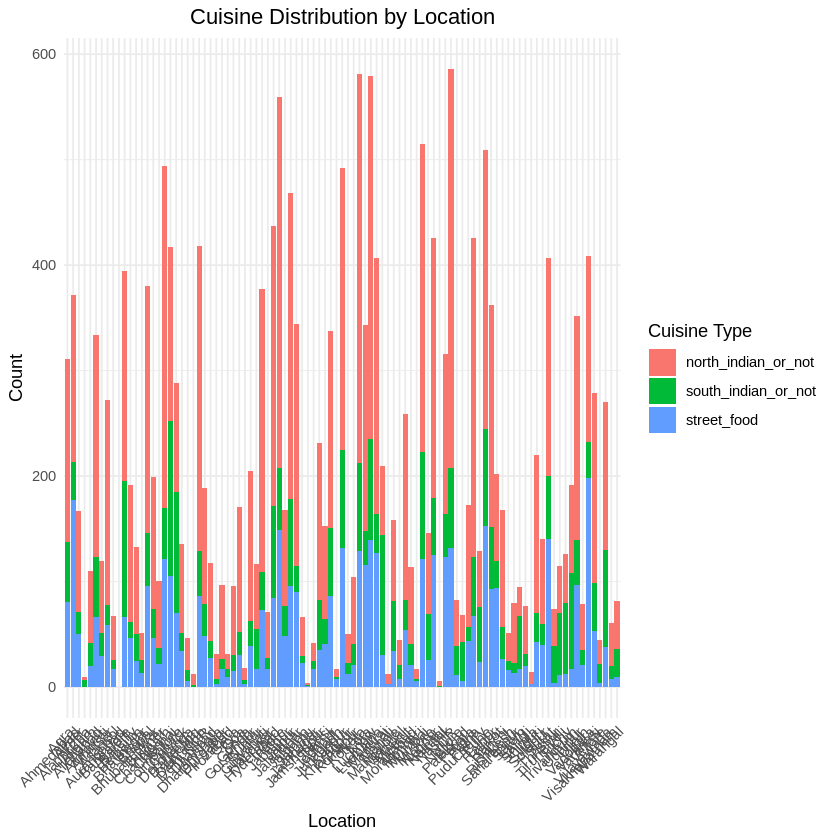

In [49]:
plot <- ggplot(regional_counts_long, aes(x = location, y = count, fill = cuisine)) +
  geom_bar(stat = "identity", position = "stack") +
  labs(
    title = "Cuisine Distribution by Location",
    x = "Location",
    y = "Count",
    fill = "Cuisine Type"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5),
    axis.text.x = element_text(angle = 45, hjust = 1)
  )

# Save the plot with specified width and height
ggsave("cuisine_distribution_by_location.png", plot = plot, width = 20, height = 6, dpi = 300)

(plot)

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


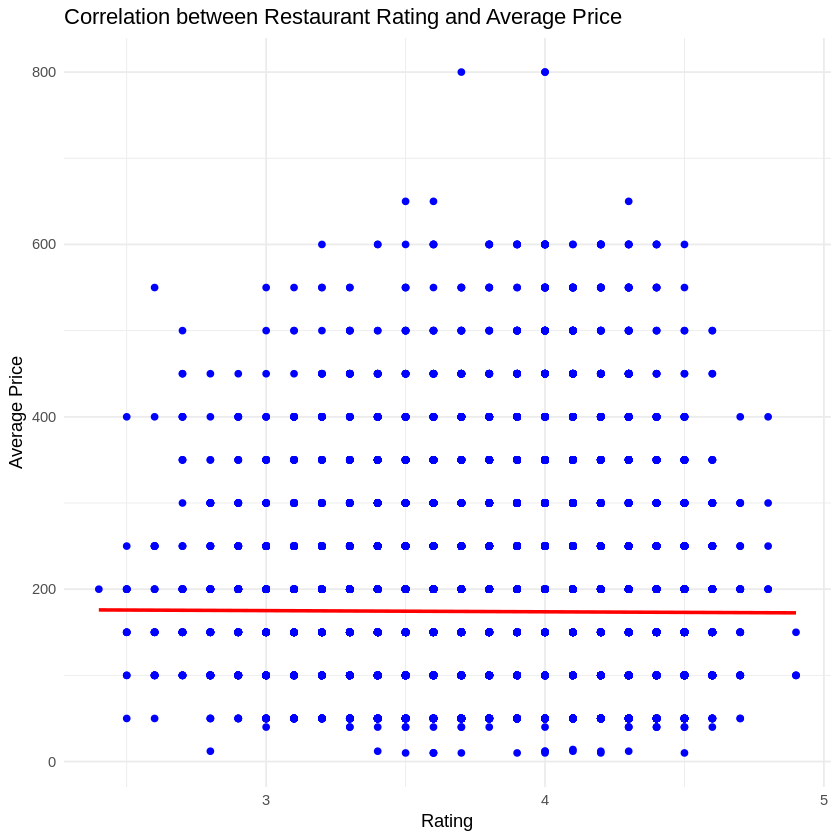

In [50]:
ggplot(dataset, aes(x = rating, y = average_price)) +
  geom_point(color = "blue") +  # Scatter points
  geom_smooth(method = "lm", se = FALSE, color = "red") +  # Fits a linear model (lm), which provides the trendline, and sets se = FALSE to remove the shaded confidence interval around the line.
  labs(
    title = "Correlation between Restaurant Rating and Average Price",
    x = "Rating",
    y = "Average Price"
  ) +
  theme_minimal()
# Save the plot with increased width
ggsave("rating_vs_price_correlation.png", width = 12, height = 6, dpi = 300)

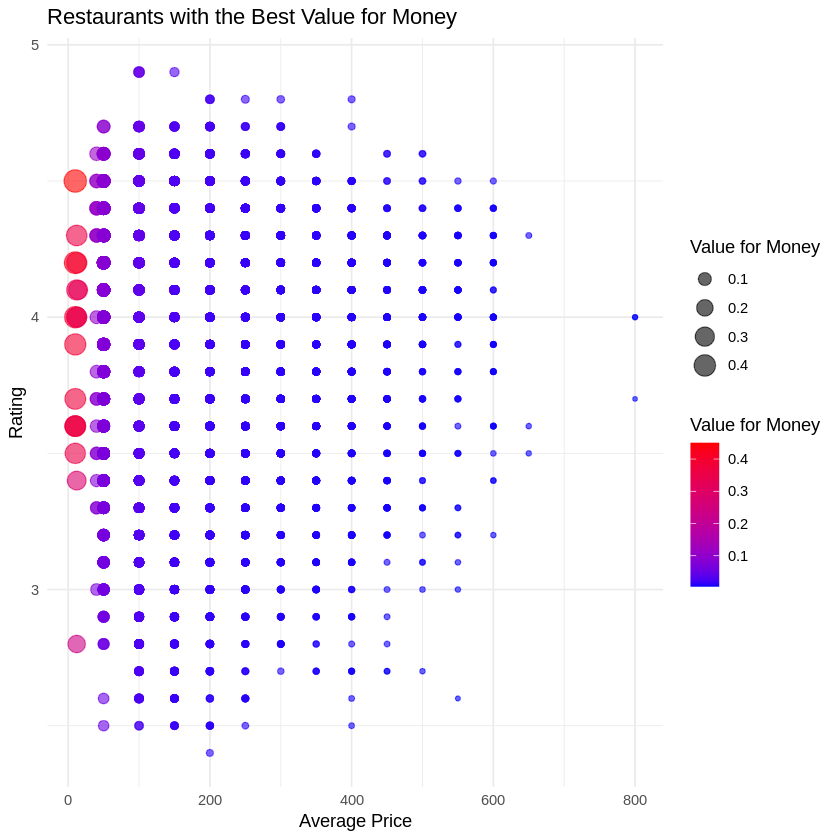

In [51]:

dataset$value_for_money <- dataset$rating / dataset$average_price
ggplot(dataset, aes(x = average_price, y = rating, size = value_for_money, color = value_for_money)) +
  geom_point(alpha = 0.6) +
  labs(
    title = "Restaurants with the Best Value for Money",
    x = "Average Price",
    y = "Rating",
    color = "Value for Money",
    size = "Value for Money"
  ) +
  theme_minimal() +
  scale_color_gradient(low = "blue", high = "red")  # Gradient color from blue (low) to red (high)

     location   n
1     Kolkata 978
2         NCR 843
3     Lucknow 781
4   Hyderabad 714
5  Chandigarh 679
6      Mumbai 653
7      Kanpur 652
8      Indore 630
9        Pune 621
10   Ludhiana 616


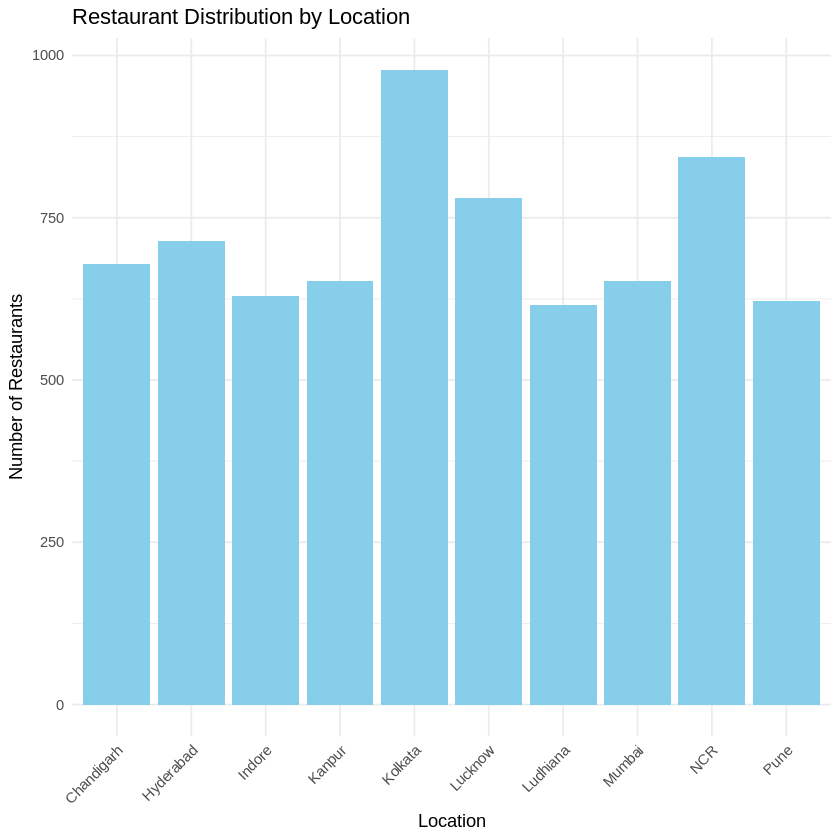

In [52]:
location_counts <- dataset %>%
  count(location) %>%
  arrange(desc(n)) %>%
  head(10)

print(location_counts)
ggplot(location_counts, aes(x = location, y = n)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  labs(
    title = "Restaurant Distribution by Location",
    x = "Location",
    y = "Number of Restaurants"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [53]:
dataset$south_indian_or_not <- as.factor(dataset$south_indian_or_not)
dataset$north_indian_or_not <- as.factor(dataset$north_indian_or_not)
dataset$fast_food_or_not <- as.factor(dataset$fast_food_or_not)
dataset$street_food <- as.factor(dataset$street_food)
dataset$biryani_or_not <- as.factor(dataset$biryani_or_not)
dataset$bakery_or_not <- as.factor(dataset$bakery_or_not)


dataset <- dataset %>% select(rating, average_price, `average _delivery_time`, south_indian_or_not, north_indian_or_not, fast_food_or_not, street_food, biryani_or_not, bakery_or_not, location)

In [54]:
model <- lm(average_price ~ rating + `average _delivery_time` + south_indian_or_not + north_indian_or_not + fast_food_or_not + street_food + biryani_or_not + bakery_or_not + location, data = dataset)
summary(model)
dataset$predicted_values <- predict(model)


Call:
lm(formula = average_price ~ rating + `average _delivery_time` + 
    south_indian_or_not + north_indian_or_not + fast_food_or_not + 
    street_food + biryani_or_not + bakery_or_not + location, 
    data = dataset)

Residuals:
    Min      1Q  Median      3Q     Max 
-196.26  -61.41  -17.15   38.18  611.86 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              176.36499    7.86063  22.436  < 2e-16 ***
rating                    -3.43529    1.51094  -2.274 0.022997 *  
`average _delivery_time`   0.20663    0.05976   3.458 0.000546 ***
south_indian_or_not1      -3.00482    1.57906  -1.903 0.057061 .  
north_indian_or_not1       2.58815    1.15689   2.237 0.025283 *  
fast_food_or_not1         -1.42107    1.09702  -1.295 0.195196    
street_food1              -4.04157    1.37492  -2.940 0.003290 ** 
biryani_or_not1            0.34689    1.46471   0.237 0.812788    
bakery_or_not1             0.80884    1.82449   0.443 0.657536   

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


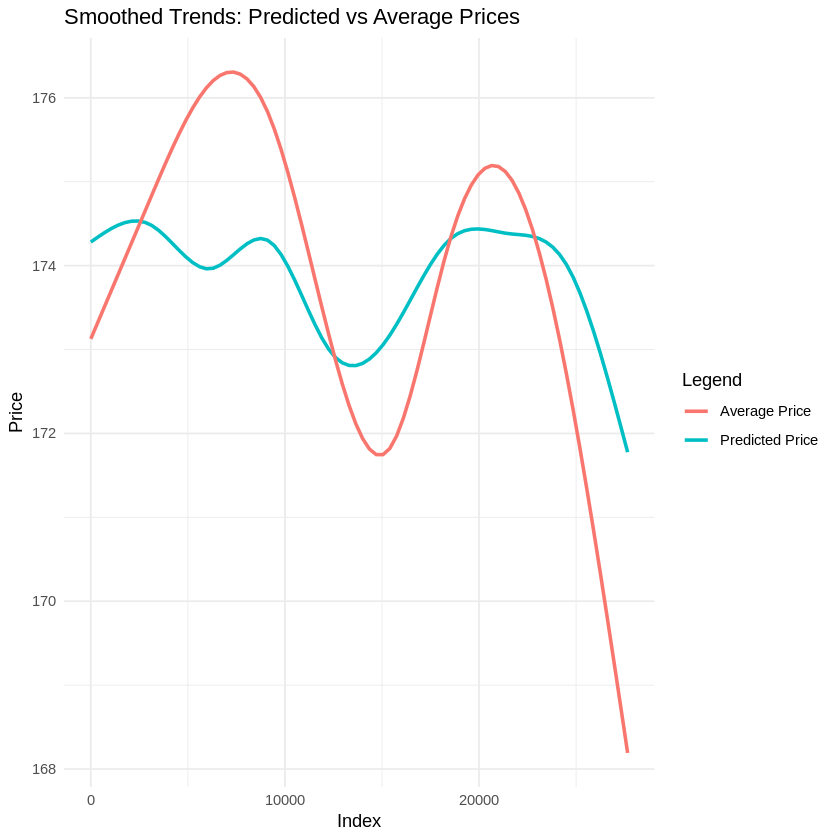

In [55]:

dataset$index <- 1:nrow(dataset)
ggplot(dataset, aes(x = index)) +
  geom_smooth(aes(y = predicted_values, color = "Predicted Price"), se = FALSE) +
  geom_smooth(aes(y = average_price, color = "Average Price"), se = FALSE) +
  labs(title = "Smoothed Trends: Predicted vs Average Prices",
       x = "Index",
       y = "Price",
       color = "Legend") +
  theme_minimal()


In [3]:
git init

ERROR: Error in parse(text = input): <text>:1:5: unexpected symbol
1: git init
        ^
